Задание 1.

A1: 
[[100  -1   0   0]
 [ -1 100  -1   0]
 [  0  -1 100  -1]
 [  0   0  -1 100]]


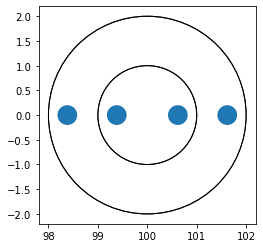


Min A1 eigen:  98.34999999999125  max A1 eigen:  101.64999999992922

A2: 
[[ 2 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  2]]

Lambda =  0.34999999999998127
Spectral radius =  3.650000000000035
|Lambda - 4| =  3.6500000000000186


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from math import sin, pi
import numpy.linalg as npl



def draw(matrix, n):

    axis = plt.gca()

    for i in range(n):

        sum = 0

        for j in range(n):

            if i != j:
                sum += abs(matrix[i][j])

        circle = plt.Circle((matrix[i][i], 0), radius=sum, fill=False)

        axis.add_patch(circle)

    plt.axis('scaled')

    eigenVect, useless = np.linalg.eig(matrix)

    for j in eigenVect:
        circle = plt.Circle((j, 0), radius=0.2)
        axis.add_patch(circle)

    plt.show()
    

def approx_eigen(matrix, line):
    return np.linalg.det(matrix - line * np.eye(len(matrix)))


def calculate(matrix, left, right, eigen):

    while abs(approx_eigen(matrix, eigen)) > 1e-6:
        eigen = left + (right - left) / 2

        if np.sign(approx_eigen(matrix, left)) == np.sign(approx_eigen(matrix, eigen)):
            leftMin = eigen
        else:
            rightMin = eigen

        return eigen


def min_n_max(matrix):
    diag = np.diag(matrix)

    leftMin = [0] * len(matrix)
    rightMax = [0] * len(matrix)

    elements = []

    for i in range(len(matrix)):
        elements += [abs(j) for j in matrix[i]]

        leftMin[i] = diag[i] + abs(diag[i]) - sum(elements)
        rightMax[i] = diag[i] + abs(diag[i]) + sum(elements)

    mini = 0
    maxi = 0

    for x in leftMin:
        if x < mini:
            mini = x
            
    for x in rightMax:
        if x > maxi:
            maxi = x        

    leftMin = mini
    rightMin = leftMin + 0.1

    rightMax = maxi
    leftMax = rightMax - 0.1

    while np.sign(approx_eigen(matrix, leftMin)) == np.sign(approx_eigen(matrix, rightMin)):
        rightMin += 0.1

    while np.sign(approx_eigen(matrix, leftMax)) == np.sign(approx_eigen(matrix, rightMax)):
        leftMax -= 0.1

    leftMin = rightMin - 0.1
    rightMax = leftMax + 0.1

    minimum = leftMin + (rightMin - leftMin) / 2
    maximum = leftMax + (rightMax - leftMax) / 2

    minimum = calculate(matrix, leftMin, rightMin, minimum)
    maximum = calculate(matrix, leftMax, rightMax, maximum)

    return minimum, maximum


A1 = [[100, -1, 0, 0],
      [-1, 100, -1, 0],
      [0, -1, 100, -1],
      [0, 0, -1, 100]]

A2 = [[2, -1, 0, 0],
      [-1, 2, -1, 0],
      [0, -1, 2, -1],
      [0, 0, -1, 2]]

print("A1: ")
print(np.array(A1))

draw(A1, 4)

minimum, maximum = min_n_max(A1)

print("\nMin A1 eigen: ", minimum, " max A1 eigen: ", maximum)

A2 = [[2, -1, 0, 0],
      [-1, 2, -1, 0],
      [0, -1, 2, -1],
      [0, 0, -1, 2]]

print("\nA2: ")
print(np.array(A2))

A3 = [[-2, -1, 0, 0],
      [-1, -2, -1, 0],
      [0, -1, -2, -1],
      [0, 0, -1, -2]]

min2, max2 = min_n_max(A2)
min3, max3 = min_n_max(A3)

print("\nLambda = ", min2)
print("Spectral radius = ", abs(min3))
print("|Lambda - 4| = ", abs(min2 - 4))


Задание 2.

In [9]:
def qr(matrix, eps):
    q, r = npl.qr(matrix)

    while True:
        matrix = np.dot(r, q)
        q, r = npl.qr(matrix)

        check = True

        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if i != j and abs(matrix[i][j]) > eps:
                    check = False

        if check: return matrix


def warm_equation(m, alpha, matrix):
    for i in range(m):
        for j in range(m):
            if i == j:
                matrix[i][j] = 1 + 2 * alpha
                if i - 1 >= 0:
                    matrix[i - 1][j] = -alpha
                if i + 1 < m:
                    matrix[i + 1][j] = -alpha

    eigenValues = []

    for i in range(m):
        eigenValues.append(1 + 4 * alpha * (sin((pi * (i + 1)) / (2 * m))) ** 2)

    print("A: ")
    print(matrix)

    eps = 1e-6

    print("\nExact eigenvalues:                              " + str(eigenValues))
    print(f"QR factorization eigenvalues with eps = {eps}: ", np.diag(qr(matrix, eps)))


m = 4
alpha = 0.1
matrix = np.zeros((m, m))

warm_equation(m, alpha, matrix)

mineig, maxeig = min_n_max(matrix)

print(f"\nMin eigenvalue of original matrix = {mineig} > 1 => solution is sustainable")

A: 
[[ 1.2 -0.1  0.   0. ]
 [-0.1  1.2 -0.1  0. ]
 [ 0.  -0.1  1.2 -0.1]
 [ 0.   0.  -0.1  1.2]]

Exact eigenvalues:                              [1.0585786437626905, 1.2, 1.3414213562373094, 1.4]
QR factorization eigenvalues with eps = 1e-06:  [1.3618034 1.2618034 1.1381966 1.0381966]

Min eigenvalue of original matrix = 1.050000000000002 > 1 => solution is sustainable
